In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
class usuario:
    
    def __init__(self,tipo,alpha, start_joining):
        self.tipo = tipo
        self.alpha = alpha
        self.join = start_joining
        
        self.join_bu = start_joining
        
    def U(self,DC,P):
        return self.alpha*DC-P
    
    def update_choice(self,DC,P):
        self.join = self.U(DC,P) >= 0   
        
    def restore_choice(self):
        
        self.join = self.join_bu
        

class plataforma:
    
    def __init__(self, starting_PA,starting_PB,FA,FB):
        self.PA, self.PB = starting_PA,starting_PB
        self.FA, self.FB = FA,FB
        
    def profit(self, DA, DB):
        return DA*(self.PA-self.FA)+DB*(self.PB-self.FB)
    
    def update_price(self,PA,PB):
        self.PA, self.PB = PA,PB

In [11]:
# UPDATE PRECIOS (UNA ITERACION)
def update_prices(A,B,PA,PB,Da,Db):
    
    for a in A:
        a.update_choice(Db,PA)

    for b in B:
        b.update_choice(Db,PB)

In [20]:
def update_prices_to_eq(A,B,PA,PB, print_result = False, IT_max = 50):
    it = 0
    Da = -2
    Db = -2
    Da_temp = -1
    Db_temp = -1
    print('It','Da','Db')
    for it in range(IT_max):
        Da = np.sum([a.join for a in A])
        Db = np.sum([b.join for b in B])
        
        update_prices(A,B,PA,PB,Da,Db)
        Da_temp = np.sum([a.join for a in A])
        Db_temp = np.sum([b.join for b in B])
        
        if print_result:
            print(it,Da,Db)
        
        if (((Da == Da_temp) & (Db == Db_temp))):
            break
    print(it+1,Da,Db)  
    if it == IT_max:
        print(F"Error en {PA};{PB}")

In [7]:
def update_prices_to_max(A,B,I, PA_min, PA_max,PA_delta, PB_min, PB_max, PB_delta, graph=True, IT_max = 50):
    hist = []
    for PA in range(PA_min, PA_max, PA_delta):
        for PB in range(PB_min, PB_max, PB_delta):
            
            for a in A:
                a.restore_choice()
            for b in A:
                b.restore_choice()
            
            I.update_price(PA,PB)
            update_prices_to_eq(A,B,PA,PB,False,IT_max)
            Da = np.sum([a.join for a in A])
            Db = np.sum([b.join for b in B])
            Pi = I.profit(Da,Db)
            hist.append([PA,PB,Da,Db,Pi])
    return pd.DataFrame(data=hist, columns = ["PA","PB","DA","DB","BENEFICIO"])
    

In [15]:
A = [usuario('A', a/100+0.01, a < 51) for a in range(1,101)]
B = [usuario('B', b/100, b < 51) for b in range(1,101)]
I = plataforma(20,20,10,10)
I.PA,I.PB = 15,15
update_prices(A,B,15,15,50,50)

In [17]:
Da

72

In [18]:
Db

72

In [16]:
Da = np.sum([a.join for a in A])
Db = np.sum([a.join for a in A])
I.profit(Da,Db)

720

In [23]:
5*72+5*71

715

In [24]:
A = [usuario('A', a/100+0.01, a < 51) for a in range(1,101)]
B = [usuario('B', b/100, b < 51) for b in range(1,101)]
I = plataforma(15,15,10,10)
update_prices_to_eq(A,B,15,15,True)

It Da Db
0 50 50
1 72 71
2 80 79
3 83 82
4 83 82


In [33]:
A = [usuario('A', a/100+0.05, a < 51) for a in range(1,101)]
B = [usuario('B', b/100, b < 51) for b in range(1,101)]
I = plataforma(15,15,10,10)
update_prices_to_eq(A,B,20,15,True)

It Da Db
0 50 50
1 66 71
2 77 79
3 80 82
4 81 82
5 81 82


In [155]:
A = [usuario('A', a/100, a < 51) for a in range(1,101)]
B = [usuario('B', b/100, b < 51) for b in range(1,101)]
I = plataforma(15,15,10,10)
historico = update_prices_to_max(A,B,I, 8, 42,2, 8, 42, 2, graph=True, IT_max = 50)

In [156]:
historico[historico.BENEFICIO == historico.BENEFICIO.max()]

,PA,PB,DA,DB,BENEFICIO
8,8,24,88,62,692


In [147]:
df.append([1,2])

,A,B,0
0,NaN,NaN,1.0
1,NaN,NaN,2.0


In [68]:

        
        
class market:
    
    def __init__(self, A,B,P):
        
        self.A = A
        self.B = B
        self.P = P
        self.NA = len(A)
        self.NB = len(B)
        self.DA = np.sum([a.join for a in self.A])
        self.DB = np.sum([b.join for b in self.B])
        
        self.initial_vlaues = vars(self)
        
        
    def update_price(self,PA,PB):
        
        self.P.update_price(PA,PB)
        
        for a in self.A:
            a.update_choice(self.DB, self.P.PA)

        for b in self.B:
            b.update_choice(self.DA, self.P.PB)

        self.DA = np.sum([a.join for a in self.A])
        self.DB = np.sum([b.join for b in self.B])
        

    
    def update_price_to_eq(self, PA, PB,max_it=50):
        
        self.P.update_price(PA,PB)
        
        for t in range(max_it):
            temp_NA, temp_NB = self.DA, self.DB
            self.update_price(PA,PB)
            
            if (self.DA == temp_NA)&(self.DB == temp_NB):
                break
                
        if t ==49:
            print('max_it')
            
            
def update_price_to_max(A,B,P,int_PA, int_PB):
    
    hist = []
    for pa in int_PA:
        for pb in int_PB:
            M = market(A,B,P)
            M.update_price_to_eq(M.P.PA,M.P.PB)
            M.update_price_to_eq(pa,pb)
            hist.append([pa,pb,M.DA,M.DB,M.P.profit(M.DA,M.DB)])

    return pd.DataFrame(hist,columns = ['PA','PB','DA','DB','PROFIT'])
            
            
        

In [ ]:
class market:
    
    def __init__(self, A,B,P):
        
        self.A, self.B = A,B
        self.NA,self.NB = len(A), len(B)
        self.DA = np.sum([a.join for a in self.A])
        self.DB = np.sum([b.join for b in self.B])
               
    def update_price(self,PA,PB):
        
        self.P.update_price(PA,PB)
        
        for a in self.A:
            a.update_choice(self.DB, self.P.PA)

        for b in self.B:
            b.update_choice(self.DA, self.P.PB)

        self.DA = np.sum([a.join for a in self.A])
        self.DB = np.sum([b.join for b in self.B])
        

    
    def update_price_to_eq(self, PA, PB,max_it=50):
        
        self.P.update_price(PA,PB)
        
        for t in range(max_it):
            temp_NA, temp_NB = self.DA, self.DB
            self.update_price(PA,PB)
            
            if (self.DA == temp_NA)&(self.DB == temp_NB):
                break
                
        if t ==49:
            print('max_it')
            
            
    def update_price_to_max(A,B,P,int_PA, int_PB):

        hist = []
        for pa in int_PA:
            for pb in int_PB:
                M = market(A,B,P)
                M.update_price_to_eq(M.P.PA,M.P.PB)
                M.update_price_to_eq(pa,pb)
                hist.append([pa,pb,M.DA,M.DB,M.P.profit(M.DA,M.DB)])

        return pd.DataFrame(hist,columns = ['PA','PB','DA','DB','PROFIT'])

## Dinamica Ajuste de precios al equilibrio

- $T_0:$ Situacion de equilibrio, la plataforma modifica el set de precios $\{P_A;P_B\}$ -->$\{P'_A;P'_B\}$

- $T_1:$ Cada agente vuelve a decidir si se suma a no a la plataforma considerando los nuevos precios y la cantidad de agentes que actualmente tiene la plataforma: $c(x) = x^{BR}(P'_A;P'_B;D_A^0;D_B^0) \forall x \in \{A;B\}$. Esto actualiza las demandas agregadas de cada tipo de agentes: $\{D_A^1;D_B^1\}$.

- Los agentes vuelven a ajustar sus decisioens, esta vez con la siguiente informacion:
$$c(x) = x^{BR}(P'_A;P'_B;D_A^1;D_B^1)$$

- El proceso se itera hasta que las demandas se encuentren en equilibiro, o que se realize una cantidad determianda de iteraciones.

In [34]:
# sit. inicial: Mercado equilibrio, PA=PB=15, MSA=MSB=81%
A = [agente('A',a/100, a<42) for a in range(100)]
B = [agente('B',b/100, b<50) for b in range(100)]
P = plataforma(15,15,10,10)
M = market(A,B,P)
M.update_price(15,15)

In [35]:
print('MSA', np.sum([a.join for a in A]))
print('MSB', np.sum([b.join for b in B]))
print('PA', P.PA)
print('PB', P.PB)
print('PROFIT', P.profit(M.DA,M.DB))

MSA 70
MSB 64
PA 15
PB 15
PROFIT 670


In [45]:
M.update_price(15,15)
print('MSA', np.sum([a.join for a in A]))
print('MSB', np.sum([b.join for b in B]))
print('PA', P.PA)
print('PB', P.PB)
print('PROFIT', P.profit(M.DA,M.DB))

MSA 81
MSB 81
PA 15
PB 15
PROFIT 810


In [47]:
A = [agente('A',a/100, a<42) for a in range(100)]
B = [agente('B',b/100, b<50) for b in range(100)]
P = plataforma(15,15,10,10)
M = market(A,B,P)
M.update_price_to_eq(15,15)
print('MSA', np.sum([a.join for a in A]))
print('MSB', np.sum([b.join for b in B]))
print('PA', P.PA)
print('PB', P.PB)
print('PROFIT', P.profit(M.DA,M.DB))

MSA 81
MSB 81
PA 15
PB 15
PROFIT 810


In [ ]:
print('Da')

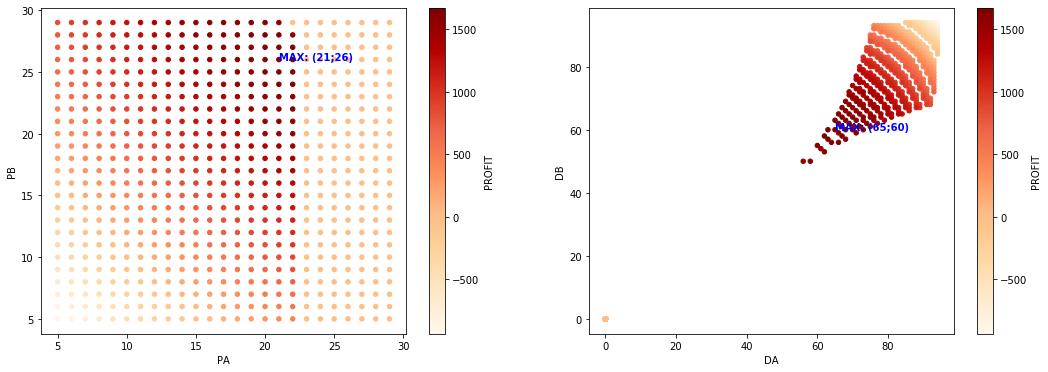

In [69]:
hist = update_price_to_max([agente('A',a/100, a<30) for a in range(100)],
                           [agente('B',b/100, b<30) for b in range(100)],
                           plataforma(20,20,10,10),range(5,30), range(5,30))
fig, ax = plt.subplots(1,2,figsize=(18,6))



max_point = hist[hist.PROFIT == hist.PROFIT.max()]


hist.plot.scatter(ax = ax[0], x='PA', y='PB', c= 'PROFIT',cmap='OrRd')
hist.plot.scatter(ax = ax[1], x='DA', y='DB', c= 'PROFIT',cmap='OrRd')



for r in max_point.index:
    ax[0].text(max_point.loc[r,'PA'],max_point.loc[r,'PB'],'MAX: ('+str(max_point.loc[r,'PA'])+';'+str(max_point.loc[r,'PB'])+')',color='blue', weight='bold')

for r in max_point.index:
    ax[1].text(max_point.loc[r,'DA'],max_point.loc[r,'DB'],'MAX: ('+str(max_point.loc[r,'DA'])+';'+str(max_point.loc[r,'DB'])+')',color='blue', weight='bold')